In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df1 = pd.read_csv('data/1step.csv', index_col='time')
df2 = pd.read_csv('data/2step.csv', index_col='time')
df1_ratio = pd.read_csv('data/1step_percent.csv', index_col='time')
df2_ratio = pd.read_csv('data/2step_percent.csv', index_col='time')

# int columns
df1.columns = [int(i) for i in df1.columns]
df1.columns = [int(i) for i in df2.columns]
df1_ratio.columns = [int(i) for i in df1_ratio.columns]
df2_ratio.columns = [int(i) for i in df2_ratio.columns]

df1_pre = df1_ratio.iloc[3000:4576]
df1_post = df1_ratio.iloc[4577:21911]
df2_pre = df2_ratio.iloc[3264:6894]
df2_post = df2_ratio.iloc[6895:35524]
df1_pre

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
600.0,0.000030,0.000018,0.000000,0.0,0.000000,0.000000,0.000000,0.000078,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
600.2,0.000023,0.000000,0.000041,0.0,0.000000,0.000022,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000019
600.4,0.000021,0.000000,0.000000,0.0,0.000000,0.000000,0.000015,0.000027,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
600.6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
600.8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000014,0.000015,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914.2,0.000053,0.000043,0.000000,0.0,0.000000,0.000000,0.000061,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
914.4,0.000000,0.000000,0.000020,0.0,0.000000,0.000000,0.000026,0.000000,0.000061,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
914.6,0.000024,0.000000,0.000020,0.0,0.000053,0.000000,0.000000,0.000000,0.000025,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [4]:
# random color generator
random.seed(38)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

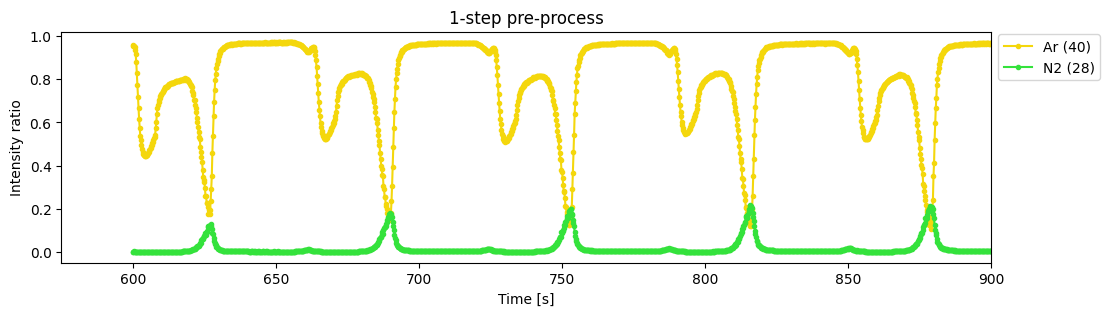

In [5]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1_pre.loc[:,40],'.-', color=colors[3])
plt.plot(df1_pre.loc[:,17],'.-', color=colors[5])
plt.xlabel('Time [s]')
plt.xlim(575,900)
plt.ylabel('Intensity ratio')
plt.title('1-step pre-process')
plt.legend(['Ar (40)','N2 (28)'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.show()

In [6]:
df1_pre_scaled = df1_pre.copy()
df2_pre_scaled = df2_pre.copy()

# min-max scaling for each column
for col in df1_pre_scaled .columns:
    df1_pre_scaled [col] = df1_pre_scaled [col].apply(lambda x: (x-df1_pre_scaled [col].min())/(df1_pre_scaled [col].max()-df1_pre_scaled [col].min()))

# min-max scaling for each column
for col in df2_pre_scaled.columns:
    df2_pre_scaled[col] = df2_pre_scaled[col].apply(lambda x: (x-df2_pre_scaled[col].min())/(df2_pre_scaled[col].max()-df2_pre_scaled[col].min()))
    
df1_pre_scaled

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
600.0,0.041698,0.034794,0.000000,0.00101,0.000000,0.000000,0.000000,0.094293,0.001844,0.0,...,0.003587,0.0,0.000000,0.000373,0.0,0.005338,0.0,0.016011,0.00169,0.000000
600.2,0.031534,0.000000,0.051540,0.00101,0.000000,0.056058,0.000000,0.000000,0.001844,0.0,...,0.003587,0.0,0.000000,0.000373,0.0,0.005338,0.0,0.016011,0.00169,0.045353
600.4,0.029392,0.000000,0.000000,0.00101,0.000000,0.000000,0.020445,0.033153,0.001844,0.0,...,0.003587,0.0,0.000000,0.000373,0.0,0.005338,0.0,0.016011,0.00169,0.000000
600.6,0.000000,0.000000,0.000000,0.00101,0.000000,0.000000,0.000000,0.000000,0.001844,0.0,...,0.003587,0.0,0.000000,0.000373,0.0,0.005338,0.0,0.016011,0.00169,0.000000
600.8,0.000000,0.000000,0.000000,0.00101,0.000000,0.000000,0.000000,0.016839,0.029178,0.0,...,0.003587,0.0,0.000000,0.000373,0.0,0.005338,0.0,0.016011,0.00169,0.040133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914.2,0.072770,0.081911,0.000000,0.00101,0.000000,0.000000,0.081368,0.000000,0.001844,0.0,...,0.003587,0.0,0.000000,0.000373,0.0,0.005338,0.0,0.016011,0.00169,0.000000
914.4,0.000000,0.000000,0.025214,0.00101,0.000000,0.000000,0.034187,0.000000,0.116334,0.0,...,0.003587,0.0,0.000000,0.000373,0.0,0.005338,0.0,0.016011,0.00169,0.000000
914.6,0.032329,0.000000,0.025364,0.00101,0.100093,0.000000,0.000000,0.000000,0.048283,0.0,...,0.003587,0.0,0.000000,0.000373,0.0,0.005338,0.0,0.016011,0.00169,0.000000


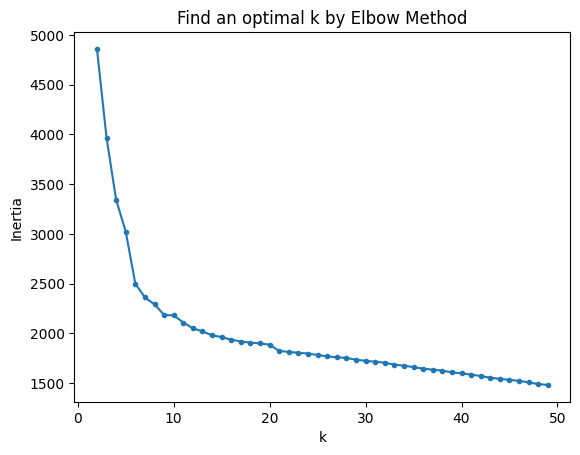

In [11]:
# find the best k for K-Means alg
inertia = []
test = 50
for k in range(2,test):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df1_pre_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,test),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

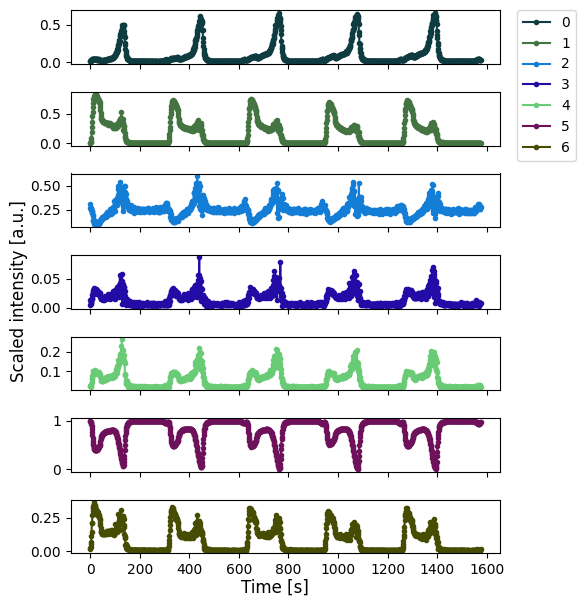

[23, 17, 10, 150, 83, 1, 30]


,pattern0,pattern1,pattern2,pattern3,pattern4,pattern5,pattern6
0,14.0,63.0,20.0,2,21.0,40.0,56.0
1,15.0,64.0,39.0,3,22.0,NaN,62.0
2,16.0,65.0,41.0,4,23.0,NaN,66.0
3,17.0,98.0,42.0,5,24.0,NaN,67.0
4,18.0,99.0,43.0,6,25.0,NaN,68.0
...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,311,NaN,NaN,NaN
146,NaN,NaN,NaN,312,NaN,NaN,NaN
147,NaN,NaN,NaN,313,NaN,NaN,NaN
148,NaN,NaN,NaN,314,NaN,NaN,NaN


In [38]:
k = 7
km = KMeans(n_clusters=k, random_state=42)
km.fit(df1_pre_scaled.T)

# random color generator
import random
random.seed(31)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

# colors
label_color = colors

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,6))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('Scaled intensity [a.u.]', x=-0.03)
fig.legend(set(km.labels_), bbox_to_anchor=(0.97, 0.98), loc='upper left')
fig.savefig(f'data/figure/1step_pre_patterns.png', bbox_inches='tight')
plt.show()

# num of elements1
wv_labled = []
for i in range(k): 
    wv_labled.append(df1_pre_scaled.T[km.labels_==i].index.tolist())
print([len(i) for i in wv_labled])

df_labeled = []
for i in range(0,k):
    df_labeled.append(pd.DataFrame(wv_labled[i], columns=[f'pattern{i}']))
df_labeled = pd.concat([i for i in df_labeled], axis=1)
df_labeled.to_csv(f'data/1step_pre_patterns.csv')
df_labeled

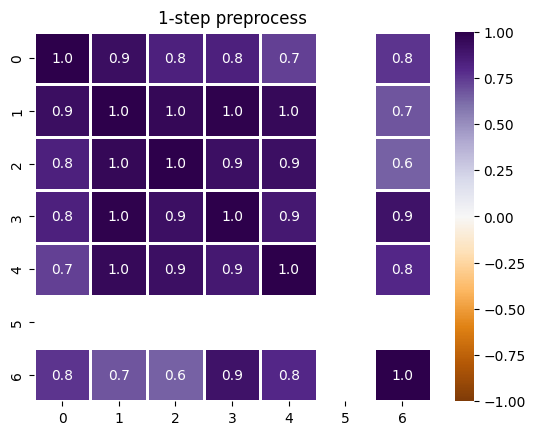

In [48]:
# correlation between the patterns
df_labeled_corr = df_labeled.corr()
cust_labels = [str(i) for i in range(len(df_labeled_corr.columns))]

fig, axs = plt.subplots()
sns.heatmap(df_labeled_corr, annot=True, linewidths=1, cmap=plt.cm.PuOr, vmin=-1, vmax=1, xticklabels=cust_labels, yticklabels=cust_labels, fmt='.1f') # annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1
axs.set_title('1-step preprocess')
plt.show()

fig.savefig('data/figure/1step_pre_correlation.png', bbox_inches='tight')

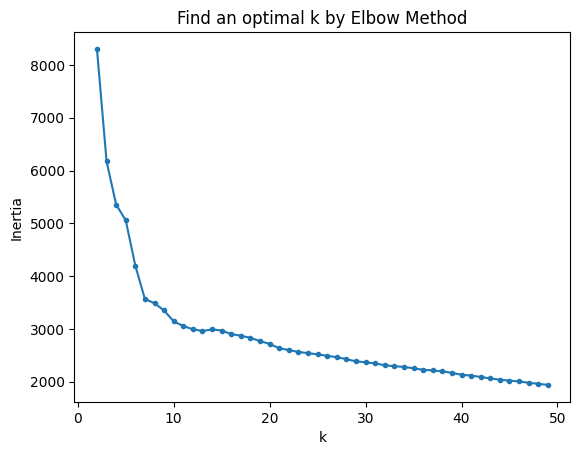

In [40]:
# find the best k for K-Means alg
inertia = []
for k in range(2,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df2_pre_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,50),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

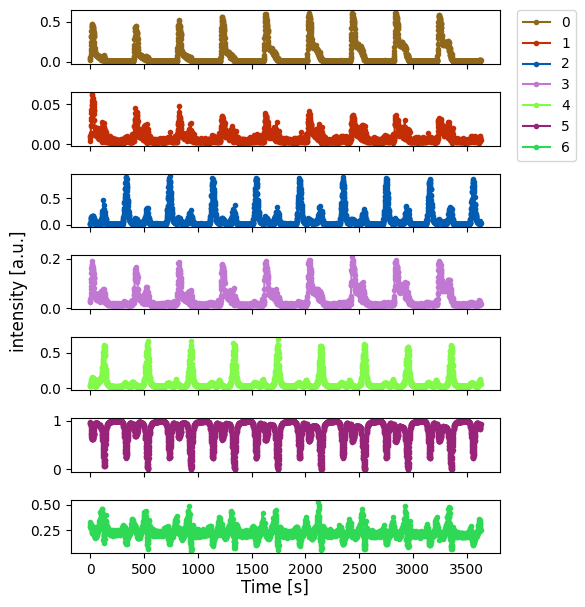

[36, 188, 4, 67, 7, 1, 11]


,pattern0,pattern1,pattern2,pattern3,pattern4,pattern5,pattern6
0,35.0,2,14.0,21.0,15.0,40.0,20.0
1,37.0,3,28.0,22.0,16.0,NaN,39.0
2,47.0,4,29.0,23.0,17.0,NaN,41.0
3,62.0,5,31.0,30.0,18.0,NaN,42.0
4,63.0,6,NaN,33.0,19.0,NaN,43.0
...,...,...,...,...,...,...,...
183,NaN,311,NaN,NaN,NaN,NaN,NaN
184,NaN,312,NaN,NaN,NaN,NaN,NaN
185,NaN,313,NaN,NaN,NaN,NaN,NaN
186,NaN,314,NaN,NaN,NaN,NaN,NaN


In [49]:
k = 7
km = KMeans(n_clusters=k, random_state=42)
km.fit(df2_pre_scaled.T)

# random color generator
import random
random.seed(30)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

# colors
label_color = colors

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,6))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.legend(set(km.labels_), bbox_to_anchor=(0.97, 0.98), loc='upper left')
# fig.savefig(f'data/figure/2step_pre_patterns.png', bbox_inches='tight')
plt.show()

# num of elements1
wv_labled = []
for i in range(k): 
    wv_labled.append(df2_pre_scaled.T[km.labels_==i].index.tolist())
print([len(i) for i in wv_labled])

df_labeled = []
for i in range(0,k):
    df_labeled.append(pd.DataFrame(wv_labled[i], columns=[f'pattern{i}']))
df_labeled = pd.concat([i for i in df_labeled], axis=1)
# df_labeled.to_csv(f'data/2step_pre_patterns.csv')
df_labeled

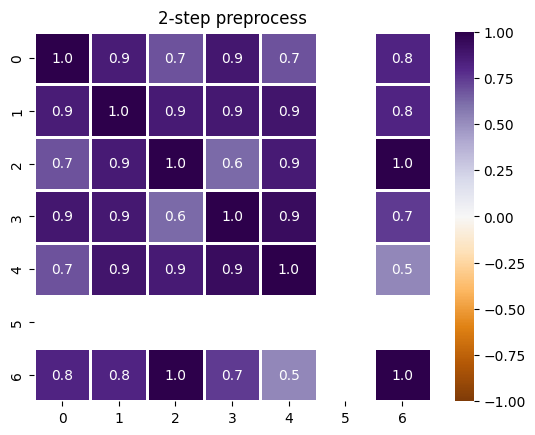

In [50]:
# correlation between the patterns
df_labeled_corr = df_labeled.corr()
cust_labels = [str(i) for i in range(len(df_labeled_corr.columns))]

fig, axs = plt.subplots()
sns.heatmap(df_labeled_corr, annot=True, linewidths=1, cmap=plt.cm.PuOr, vmin=-1, vmax=1, xticklabels=cust_labels, yticklabels=cust_labels, fmt='.1f') # annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1
axs.set_title('2-step preprocess')
plt.show()

fig.savefig('data/figure/2step_pre_correlation.png', bbox_inches='tight')

In [20]:
# at the end of the post
df1_post = df1_ratio.iloc[20335:21911]
df2_post = df2_ratio.iloc[31894:35524]

In [21]:
# scaling
df1_post_scaled = df1_post.copy()
df2_post_scaled = df2_post.copy()

# min-max scaling for each column
for col in df1_post_scaled.columns:
    df1_post_scaled[col] = df1_post_scaled[col].apply(lambda x: (x-df1_post_scaled[col].min())/(df1_post_scaled[col].max()-df1_post_scaled[col].min()))

# min-max scaling for each column
for col in df2_post_scaled.columns:
    df2_post_scaled[col] = df2_post_scaled[col].apply(lambda x: (x-df2_post_scaled[col].min())/(df2_post_scaled[col].max()-df2_post_scaled[col].min()))
    
df1_post_scaled

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
4067.0,0.042568,0.000000,0.000000,0.002557,0.000000,0.000000,0.019627,0.062465,0.016270,0.000000,...,0.000000,0.000000,0.002337,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000704
4067.2,0.020208,0.000000,0.046645,0.002557,0.047363,0.053537,0.002303,0.000000,0.054273,0.045411,...,0.000000,0.070593,0.002337,0.0,0.112386,0.060896,0.000000,0.0,0.0,0.000704
4067.4,0.000000,0.000000,0.000000,0.002557,0.000000,0.052746,0.060070,0.033091,0.000000,0.062636,...,0.000000,0.000000,0.002337,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000704
4067.6,0.032668,0.038286,0.000000,0.045969,0.000000,0.000000,0.002303,0.024956,0.024488,0.000000,...,0.000000,0.000000,0.002337,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.072778
4067.8,0.096023,0.032106,0.000000,0.002557,0.000000,0.000000,0.002303,0.060978,0.052368,0.000000,...,0.000000,0.000000,0.135616,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381.2,0.008919,0.000000,0.000000,0.020251,0.025178,0.009351,0.027678,0.036180,0.036358,0.047960,...,0.000000,0.000000,0.002337,0.0,0.000000,0.000000,0.042594,0.0,0.0,0.000704
4381.4,0.012114,0.021624,0.000000,0.002557,0.000000,0.000000,0.013050,0.041421,0.027571,0.036871,...,0.000000,0.000000,0.002337,0.0,0.119025,0.000000,0.000000,0.0,0.0,0.000704
4381.6,0.000000,0.000000,0.000000,0.002557,0.000000,0.000000,0.002303,0.020254,0.025866,0.000000,...,0.000000,0.000000,0.002337,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000704


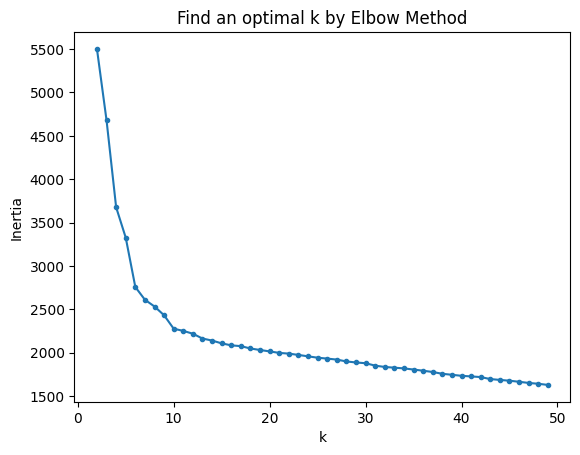

In [22]:
# find the best k for K-Means alg
inertia = []
for k in range(2,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df1_post_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,50),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

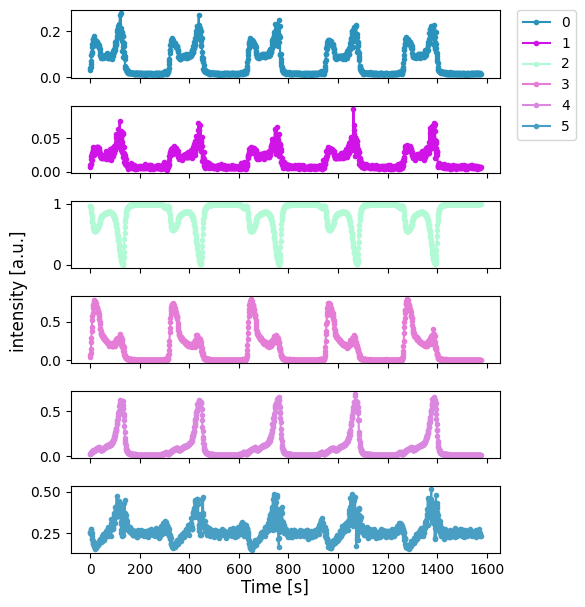

[81, 169, 1, 24, 26, 13]


,pattern0,pattern1,pattern2,pattern3,pattern4,pattern5
0,22.0,2,40.0,63.0,14.0,20.0
1,23.0,3,NaN,64.0,15.0,39.0
2,25.0,4,NaN,65.0,16.0,41.0
3,26.0,5,NaN,66.0,17.0,42.0
4,27.0,6,NaN,67.0,18.0,43.0
...,...,...,...,...,...,...
164,NaN,311,NaN,NaN,NaN,NaN
165,NaN,312,NaN,NaN,NaN,NaN
166,NaN,313,NaN,NaN,NaN,NaN
167,NaN,314,NaN,NaN,NaN,NaN


In [51]:
k = 6
km = KMeans(n_clusters=k, random_state=42)
km.fit(df1_post_scaled.T)

# random color generator
import random
random.seed(29)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

# colors
label_color = colors

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,6))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.legend(set(km.labels_), bbox_to_anchor=(0.97, 0.98), loc='upper left')
# fig.savefig(f'data/figure/1step_post_patterns.png', bbox_inches='tight')
plt.show()

# num of elements1
wv_labled = []
for i in range(k): 
    wv_labled.append(df2_pre_scaled.T[km.labels_==i].index.tolist())
print([len(i) for i in wv_labled])

df_labeled = []
for i in range(0,k):
    df_labeled.append(pd.DataFrame(wv_labled[i], columns=[f'pattern{i}']))
df_labeled = pd.concat([i for i in df_labeled], axis=1)
# df_labeled.to_csv(f'data/1step_post_patterns.csv')
df_labeled

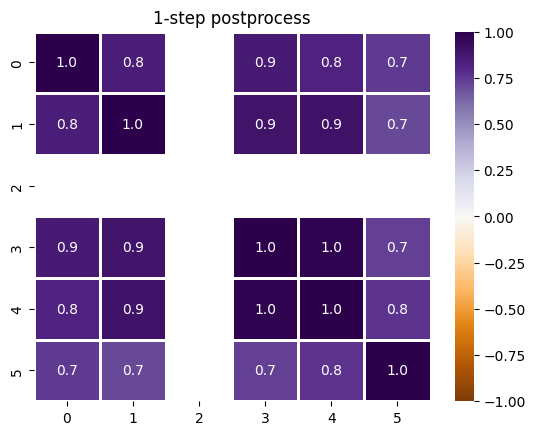

In [52]:
# correlation between the patterns
df_labeled_corr = df_labeled.corr()
cust_labels = [str(i) for i in range(len(df_labeled_corr.columns))]

fig, axs = plt.subplots()
sns.heatmap(df_labeled_corr, annot=True, linewidths=1, cmap=plt.cm.PuOr, vmin=-1, vmax=1, xticklabels=cust_labels, yticklabels=cust_labels, fmt='.1f') # annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1
axs.set_title('1-step postprocess')
plt.show()

fig.savefig('data/figure/1step_post_correlation.png', bbox_inches='tight')

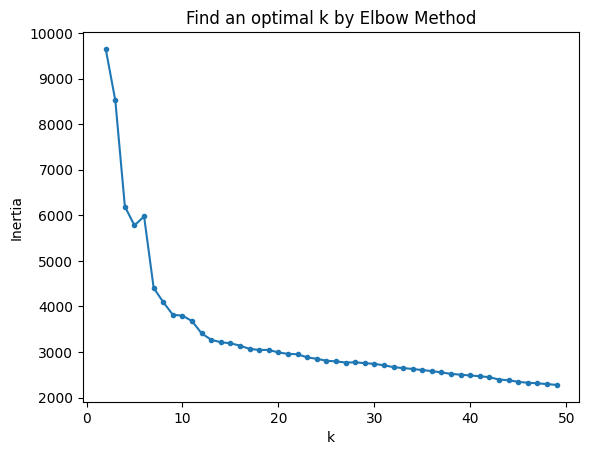

In [27]:
# find the best k for K-Means alg
inertia = []
for k in range(2,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df2_post_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,50),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

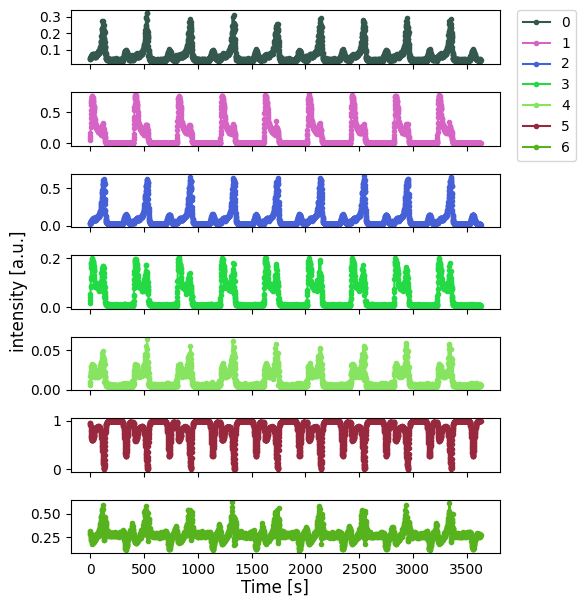

[32, 20, 18, 54, 180, 1, 9]


,pat|tern0,pat|tern1,pat|tern2,pat|tern3,pat|tern4,pat|tern5,pat|tern6
0,21.0,63.0,14.0,56.0,2,40.0,20.0
1,22.0,64.0,15.0,61.0,3,NaN,39.0
2,23.0,65.0,16.0,62.0,4,NaN,41.0
3,24.0,67.0,17.0,66.0,5,NaN,42.0
4,25.0,98.0,18.0,68.0,6,NaN,43.0
...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,311,NaN,NaN
176,NaN,NaN,NaN,NaN,312,NaN,NaN
177,NaN,NaN,NaN,NaN,313,NaN,NaN
178,NaN,NaN,NaN,NaN,314,NaN,NaN


In [53]:
k = 7
km = KMeans(n_clusters=k, random_state=42)
km.fit(df2_post_scaled.T)

# random color generator
import random
random.seed(28)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

# colors
label_color = colors

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,6))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.legend(set(km.labels_), bbox_to_anchor=(0.97, 0.98), loc='upper left')
# fig.savefig(f'data/figure/2step_post_patterns.png', bbox_inches='tight')
plt.show()

# num of elements1
wv_labled = []
for i in range(k): 
    wv_labled.append(df2_pre_scaled.T[km.labels_==i].index.tolist())
print([len(i) for i in wv_labled])

df_labeled = []
for i in range(0,k):
    df_labeled.append(pd.DataFrame(wv_labled[i], columns=[f'pat|tern{i}']))
df_labeled = pd.concat([i for i in df_labeled], axis=1)
# df_labeled.to_csv(f'data/2step_post_patterns.csv')
df_labeled

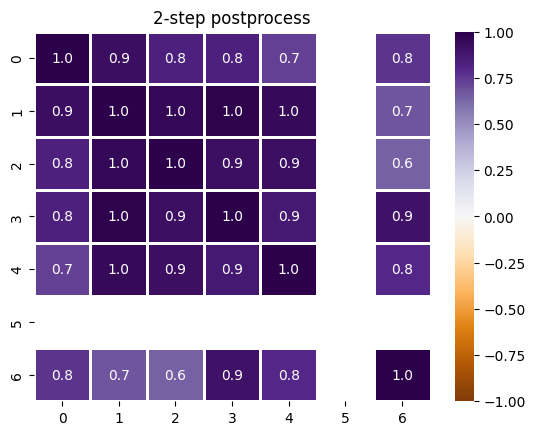

In [54]:
# correlation between the patterns
df_labeled_corr = df_labeled.corr()
cust_labels = [str(i) for i in range(len(df_labeled_corr.columns))]

fig, axs = plt.subplots()
sns.heatmap(df_labeled_corr, annot=True, linewidths=1, cmap=plt.cm.PuOr, vmin=-1, vmax=1, xticklabels=cust_labels, yticklabels=cust_labels, fmt='.1f') # annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1
axs.set_title('2-step postprocess')
plt.show()

fig.savefig('data/figure/2step_post_correlation.png', bbox_inches='tight')